In [1]:
import os
os.environ['FLYTE_PLATFORM_URL'] = "flyte-staging.lyft.net"
from flytekit.sdk.types import Types
from flytekit.common import utils
from flytekit.common.workflow_execution import SdkWorkflowExecution

from IPython.display import Image
from IPython.core.display import HTML 

In [3]:
wf = SdkWorkflowExecution.fetch(project="flytekubecondemo2019", domain="development", name="gt1785aotr")
# print(wf.outputs)

In [4]:
wf = SdkWorkflowExecution.fetch(project="flytekubecondemo2019", domain="development", name="f1487e14d159749d0a9f")
print(wf.outputs["confusion_matrix_image"])

metadata {
  type {
  }
}
uri: "s3://lyft-modelbuilder/fg/50822df4ba23a48f29afdf81aa32d326"



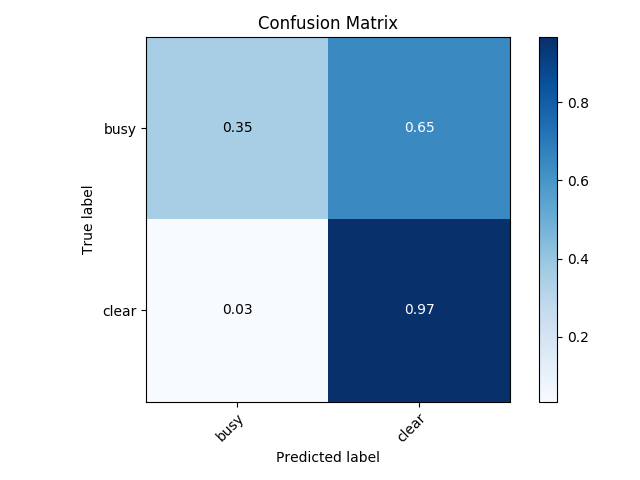

In [5]:
local_file = "/tmp/cm-4.png"
wf.outputs["confusion_matrix_image"].download(local_file, overwrite=True)
from IPython.display import Image
Image(filename=local_file)

In [2]:
from workflows.classifier_train_workflow import train_lp
from flytekit.common.launch_plan import SdkLaunchPlan

PROJECT="flytekubecondemo2019"
dataprep_wf_exec = SdkWorkflowExecution.fetch(project=PROJECT, domain="development", name="u86fgpn177-prepare-0")
frames_mpblobs = dataprep_wf_exec.outputs["selected_frames_mpblobs"]
streams_names = dataprep_wf_exec.outputs["streams_names_out"]

DEFAULT_TRAINING_VALIDATION_CONFIG_FILE = "models/classifier/resnet50/configs/model_training_config_demo.json"

train_lp = SdkLaunchPlan.fetch(
    project=PROJECT, 
    domain="development", 
    name="workflows.classifier_train_workflow.ClassifierTrainWorkflow",
    version="90f2cf9697e9478b8b165effc3d411ff51519f4c")

train_lp.execute(
    project=PROJECT,
    domain="development",
    inputs={
        "available_streams_mpblobs": frames_mpblobs,
        "available_streams_names": streams_names,
        "streams_metadata_path": "s3://lyft-modelbuilder/metadata/_FlyteKubeconDemo2019Dataset/metadata/streams_metadata.json",
    }
)

Using TensorFlow backend.


id {
  project: "flytekubecondemo2019"
  domain: "development"
  name: "f987aa947e7914a7b993"
}
spec {
  launch_plan {
    resource_type: LAUNCH_PLAN
    project: "flytekubecondemo2019"
    domain: "development"
    name: "workflows.classifier_train_workflow.ClassifierTrainWorkflow"
    version: "90f2cf9697e9478b8b165effc3d411ff51519f4c"
  }
  inputs {
    literals {
      key: "available_streams_mpblobs"
      value {
        collection {
          literals {
            scalar {
              blob {
                metadata {
                  type {
                    dimensionality: MULTIPART
                  }
                }
                uri: "s3://lyft-modelbuilder/re/0d98b28f3762b0562ed31208442008b3/"
              }
            }
          }
          literals {
            scalar {
              blob {
                metadata {
                  type {
                    dimensionality: MULTIPART
                  }
                }
                uri: "s3://lyft-m

In [2]:
PROJECT="flytekubecondemo2019"
eval_wf_exec = SdkWorkflowExecution.fetch(project=PROJECT, domain="development", name="fpn6gaba")

ground_truths_out = eval_wf_exec.get_node_executions()["evaluate-on-datasets-task"].outputs["ground_truths_out"]
predictions_out = eval_wf_exec.get_node_executions()["evaluate-on-datasets-task"].outputs["predictions_out"]



In [3]:
from utils.metric_utils.metric_utils import calculate_cutoff_youdens_j, calculate_precision_recall_curve, calculate_roc_curve
from models.classifier.resnet50.constants import DEFAULT_CLASS_LABELS, DEFAULT_POSITIVE_LABEL
from workflows.classifier_evaluate_workflow import generate_predictions

generate_predictions.unit_test(ground_truths=ground_truths_out, probabilities=predictions_out)




Using TensorFlow backend.


{'predictions': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,


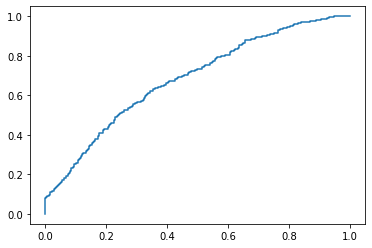

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 

In [8]:
opt, ths, preds = generate_predictions(ground_truths=ground_truths_out, probabilities=predictions_out)
print(preds)
print(opt)

In [ ]:
from flytekit.common.launch_plan import SdkLaunchPlan

PROJECT="flytekubecondemo2019"
train_wf_exec = SdkWorkflowExecution.fetch(project=PROJECT, domain="development", name="ff0ddb4a25f0f4867b0a")
trained_model_blob = train_wf_exec.outputs["trained_models"][1]

DEFAULT_EVALUATION_CONFIG_FILE = "models/classifier/resnet50/configs/model_evaluation_config_demo.json"

eval_lp = SdkLaunchPlan.fetch(
    project=PROJECT, 
    domain="development", 
    name="workflows.classifier_train_workflow.ClassifierEvaluateWorkflow",
    version="ceba0531b9f63cef6ec574543c1bb70eb27c9df0")

eval_lp.execute(
    project=PROJECT,
    domain="development",
    inputs={
        "available_streams_mpblobs": frames_mpblobs,
        "available_streams_names": streams_names,
        "streams_metadata_path": "s3://lyft-modelbuilder/metadata/_FlyteKubeconDemo2019Dataset/metadata/streams_metadata.json",
    }
)

In [ ]:
"""
def generate_predictions(ground_truths, probabilities):
    pos_label_idx = DEFAULT_CLASS_LABELS.index(DEFAULT_POSITIVE_LABEL)
    fpr, tpr, roc_thresholds = calculate_roc_curve(
        ground_truths,
        probabilities,
        pos_label_idx=pos_label_idx,
    )
    
    threshold_val = float(calculate_cutoff_youdens_j(tpr, fpr, roc_thresholds))
    predictions = [1 if p[pos_label_idx] > threshold_val else 0 for p in probabilities]
    thresholds = [float(v) for v in roc_thresholds]
    import matplotlib.pyplot as plt
    plt.plot(fpr, tpr)
    
    plt.show()
    return threshold_val, thresholds, predictions
#    predictions.set([1 if p[pos_label_idx] > threshold_val else 0 for p in probabilities])
#    threshold.set(threshold_val)
#    thresholds.set([float(v) for v in roc_thresholds])
"""   

In [40]:
from flytekit.clis.sdk_in_container.register import register_all, register_tasks_only
import os 
from flytekit.configuration import set_flyte_config_file

os.environ["FLYTE_INTERNAL_IMAGE"] = "docker.io/lyft/flytekubecondemo2019:bb1f44c83a6e9bc6e8bc9eb98bf9c4a8e76880c7"
set_flyte_config_file("staging.config")
register_all("flytekubecondemo2019", "development", ["workflows"], version="abce", test=True)

Running task only registration for flytekubecondemo2019, development, ['workflows'] with version abce
Test switch enabled, not doing anything...
Running task, workflow, and launch plan registration for flytekubecondemo2019, development, ['workflows'] with version abce
Registering Task:                workflows.classifier_evaluate_workflow.analyze_prediction_results
Registering Task:                workflows.classifier_evaluate_workflow.fetch_model
Registering Task:                workflows.classifier_evaluate_workflow.generate_predictions
Registering Task:                workflows.classifier_train_workflow.rearrange_data
Registering Task:                workflows.classifier_evaluate_workflow.evaluate_on_datasets
Registering Workflow:            workflows.classifier_evaluate_workflow.ClassifierEvaluateWorkflow
Registering Launch Plan:         workflows.classifier_evaluate_workflow.ClassifierEvaluateWorkflow
Registering Launch Plan:         workflows.classifier_evaluate_workflow.evaluate

In [43]:
import ujson
# from flytekit.common.tasks.task import SdkTask
from flytekit.sdk.tasks import python_task, inputs, outputs
from flytekit.sdk.types import Types
from flytekit.sdk.workflow import workflow_class, Output, Input
from workflows.classifier_evaluate_workflow import evaluate_lp
from workflows.classifier_train_workflow import train_lp, DEFAULT_VALIDATION_DATA_RATIO, \
    DEFAULT_TRAINING_VALIDATION_CONFIG_FILE
from workflows.data_preparation_workflow import data_prep
from workflows.driver_workflow import pick_second


# compute_confusion_matrix = SdkTask.fetch(
#     project="kubecondemo2019-metrics",
#     domain="development",
#     name="demo_metrics.tasks.confusion_matrix.confusion_matrix",
#     version="66b463748f25ef71c8cd4eb3001f00eafb83efc6",
# )


@workflow_class
class DriverWorkflow:
    streams_external_storage_prefix = Input(Types.String, required=True)
    streams_names = Input([Types.String], required=True)
    stream_extension = Input(Types.String, default="avi")

    streams_metadata_path = Input(Types.String, required=True)
    training_validation_config_json = Input(Types.Generic,
                                            default=ujson.loads(open(DEFAULT_TRAINING_VALIDATION_CONFIG_FILE).read()))
    validation_data_ratio = Input(Types.Float, default=DEFAULT_VALIDATION_DATA_RATIO)

    prepare = data_prep(
        streams_external_storage_prefix=streams_external_storage_prefix,
        streams_names=streams_names,
        stream_extension=stream_extension)

    train = train_lp(
        available_streams_names=prepare.outputs.streams_names_out,
        available_streams_mpblobs=prepare.outputs.selected_frames_mpblobs,
        streams_metadata_path=streams_metadata_path,
        training_validation_config_json=training_validation_config_json,
        validation_data_ratio=validation_data_ratio
    )

    pick_second = pick_second(models=train.outputs.trained_models)

    evaluate = evaluate_lp(
        available_streams_names=prepare.outputs.streams_names_out,
        available_streams_mpblobs=prepare.outputs.selected_frames_mpblobs,
        streams_metadata_path=streams_metadata_path,
        evaluation_config_json=training_validation_config_json,
        model=pick_second.outputs.second,
        validation_data_ratio=validation_data_ratio
    )

    # confusion_matrix_task = compute_confusion_matrix(
    #     y_true=evaluate.outputs.ground_truths,
    #     y_pred=evaluate.outputs.predictions,
    #     title="Confusion Matrix",
    #     normalize=True,
    #     classes=["busy", "clear"],
    # )

    ground_truths = Output(evaluate.outputs.ground_truths, sdk_type=[Types.Integer])
    predictions = Output(evaluate.outputs.predictions, sdk_type=[Types.Integer])
    # confusion_matrix_image = Output(confusion_matrix_task.outputs.visual, sdk_type=Types.Blob)


driver_workflow_lp = DriverWorkflow.create_launch_plan()


In [45]:
DriverWorkflow.register("flytekubecondemo2019", "development", "workflows.driver_workflow.RegisterNotebook", "abc")


'wf:flytekubecondemo2019:development:workflows.driver_workflow.RegisterNotebook:abc'